# *Resultados*
* **Xgboost**
* Number
* nan -> median
* R²: 0.9039
* ⏱️ Tempo de execução: 9.17 segundos

# 🏠 Predição de Preços de Imóveis — *House Prices: Advanced Regression Techniques*

## Contexto
A precificação de imóveis é uma tarefa complexa que depende de múltiplos fatores estruturais, geográficos e qualitativos. Neste projeto, utilizamos o conjunto de dados de **Ames, Iowa**, amplamente reconhecido na comunidade de ciência de dados, para desenvolver um modelo preditivo de **valor de venda de residências (SalePrice)**.  

Com base em características como tamanho, qualidade da construção, idade do imóvel e localização, buscamos compreender os padrões que influenciam os preços e construir um modelo capaz de prever o valor de venda de forma precisa e consistente.



## 🎯 Objetivo Geral
Desenvolver um modelo de regressão capaz de estimar o **preço de venda de um imóvel (SalePrice)** com base em suas características físicas e estruturais.



## Objetivos Complementares
**Exploração e Pré-processamento:**  
- Investigar a distribuição da variável alvo e das principais features.  
- Tratar valores ausentes e outliers.  
- Codificar variáveis categóricas e normalizar numéricas.  

**Modelagem e Avaliação:**  
- Treinar modelos de regressão (Linear, Ridge, Lasso, Random Forest, Gradient Boosting).  
- Avaliar o desempenho via **RMSE (Root Mean Squared Error)** e validação cruzada.  
- Analisar a importância das features e interpretar os principais fatores que afetam o preço.

---

## 🗄️ Base de Dados
O conjunto de dados é composto por 79 variáveis  que descrevem aspectos de residências em Ames, Iowa. A Tabela 1 apresenta algumas dessas variaveis.

| Feature | Descrição |
|----------|------------|
| **Id** | Identificador do imóvel |
| **SalePrice** | Valor de venda (variável alvo) |
| **OverallQual** | Qualidade geral do material e acabamento |
| **GrLivArea** | Área habitável acima do solo (em pés²) |
| **YearBuilt** | Ano de construção |
| **TotalBsmtSF** | Área total do porão |
| **GarageCars** | Capacidade da garagem (número de carros) |
| **Neighborhood** | Bairro onde o imóvel está localizado |
| **LotArea** | Tamanho do terreno (em pés²) |
**Tabela 1:** Contexto das variáveis

---

## 🎯 Destaques do Projeto
<!-- **Base de Dados:** 1.460 registros válidos e 79 variáveis originais. A base apresenta valores faltantes em algumas variáveis categóricas e numéricas, que serão tratados de forma criteriosa.  
**Pré-processamento:** Codificação de variáveis categóricas via *one-hot encoding*, remoção de variáveis redundantes e padronização de escalas.  
**Análise Exploratória (EDA):** Correlação positiva entre `OverallQual`, `GrLivArea`, `GarageCars`, `TotalBsmtSF` e `SalePrice`. A variável alvo apresenta distribuição log-normal.  
**Modelagem:** Modelos testados — Regressão Linear, Ridge, Lasso, Random Forest e Gradient Boosting. O **Gradient Boosting** apresentou o menor RMSE (≈ 0.125 em escala log), indicando excelente ajuste.  
**Avaliação:** Validação cruzada com `k=5`, garantindo robustez e evitando *overfitting*.  
**Importância das Features:** `OverallQual`, `GrLivArea` e `TotalBsmtSF` surgem como os principais preditores de valor.   -->

---

## 💡 Insights Estratégicos
<!-- - **Qualidade Construtiva:** Imóveis com melhor acabamento e materiais de alta qualidade apresentam forte valorização.  
- **Tamanho é Relevante, mas Não Absoluto:** Áreas maiores impactam positivamente o preço, mas o efeito é não linear.  
- **Localização e Vizinhança:** O bairro (`Neighborhood`) explica boa parte da variabilidade dos preços, refletindo o valor agregado da região.  
- **Modelo Aplicável:** O modelo pode ser utilizado como ferramenta de apoio à decisão em avaliações imobiliárias e precificação automática.   -->

---

## 🚀 Estrutura do Notebook
1. Importação das bibliotecas  
2. Carregamento e inspeção inicial dos dados  
3. Análise exploratória (EDA)  
4. Tratamento e engenharia de variáveis  
5. Separação de treino e teste  
6. Modelagem e avaliação  
7. Previsões finais e submissão  


In [1]:
from setup_notebook import setup_path
setup_path()
from src.functions import *

# bibliotecas principais
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modelos e métricas
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform



import time


# configurações gerais
sns.set_palette('viridis')
pd.set_option('display.max_columns', None)

## 1-Dataload & Pré-Processamento Inicial

In [2]:
# Carregando os dados
dfo = pd.read_csv("/home/akel/PycharmProjects/Kaggle/HousePrices/data/train.csv")
inital_describe(dfo,True)

📊 ANÁLISE EXPLORATÓRIA DO DATAFRAME

📈 DIMENSÕES DO DATASET:
   • 1460 linhas
   • 81 colunas
   • Total de células: 118260

🔧 TIPOS DE DADOS:
   • object: 43 colunas
   • int64: 35 colunas
   • float64: 3 colunas

🔍 VERIFICAÇÃO DE QUALIDADE DOS DADOS

📝 REGISTROS DUPLICADOS:
   • Total: 0
   • Percentual: 0.00%

❌ VALORES NULOS:
   • Total: 7829
   • Percentual: 6.62%

📊 COLUNAS COM VALORES NULOS:
   • LotFrontage: 259 nulos (17.74%)
   • Alley: 1369 nulos (93.77%)
   • MasVnrType: 872 nulos (59.73%)
   • MasVnrArea: 8 nulos (0.55%)
   • BsmtQual: 37 nulos (2.53%)
   • BsmtCond: 37 nulos (2.53%)
   • BsmtExposure: 38 nulos (2.60%)
   • BsmtFinType1: 37 nulos (2.53%)
   • BsmtFinType2: 38 nulos (2.60%)
   • Electrical: 1 nulos (0.07%)
   • FireplaceQu: 690 nulos (47.26%)
   • GarageType: 81 nulos (5.55%)
   • GarageYrBlt: 81 nulos (5.55%)
   • GarageFinish: 81 nulos (5.55%)
   • GarageQual: 81 nulos (5.55%)
   • GarageCond: 81 nulos (5.55%)
   • PoolQC: 1453 nulos (99.52%)
   • Fence: 

##### **📌 Exclusão de valores nulos**:

Algumas colunas possuem grande quantidades de nulos. Definimos como critério, excluir colunas cujo número de nulos seja maior que 10%. Esse procedimento excluiu 7 features da base de dados.  

In [3]:
df=dfo.copy()
# remoção de colunas com muitos nulos (> 10%)
colunas_nulas=df.columns[(df.isnull().sum()/df.shape[0]>0.1)] # colunas com muitos nulos
df=df.drop(colunas_nulas,axis=1)

print(f"Total de valores nulos: {df.isnull().sum().sum()}")
#colunas_nulas=df.columns[(df.isnull().sum()/df.shape[0]>0.1)] # colunas com muitos nulos
#df=df.drop(colunas_nulas,axis=1)
print(f"📊 Novas DIMENSÕES: {df.shape[0]} linhas × {df.shape[1]} colunas")

Total de valores nulos: 601
📊 Novas DIMENSÕES: 1460 linhas × 74 colunas


In [4]:
colunas_nulas

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [5]:
# Novo dataframe para variaveis numericas dfn
dfn=df[df.select_dtypes(include=['number']).columns]
print(f"\n📊 DIMENSÕES: {dfn.shape[0]} linhas × {dfn.shape[1]} colunas")
# Informações sobre tipos de dados
print(f"\n🔧 Percentual de nulos(%):")
# informação sobre numero de nulos
print((dfn.isnull().sum()/(dfn.shape[0]*0.01)).sort_values(ascending=False).head(3).to_markdown())
print(f"Total de valores nulos: {dfn.isnull().sum().sum()}")
#df2=df2.dropna()
dfn = dfn.fillna(dfn.median())
print('✅ zremoção dos nulos !')
print(f"Total de valores nulos: {dfn.isnull().sum().sum()}")


📊 DIMENSÕES: 1460 linhas × 37 colunas

🔧 Percentual de nulos(%):
|             |        0 |
|:------------|---------:|
| GarageYrBlt | 5.54795  |
| MasVnrArea  | 0.547945 |
| Id          | 0        |
Total de valores nulos: 89
✅ zremoção dos nulos !
Total de valores nulos: 0


# Distribuições e boxplot 

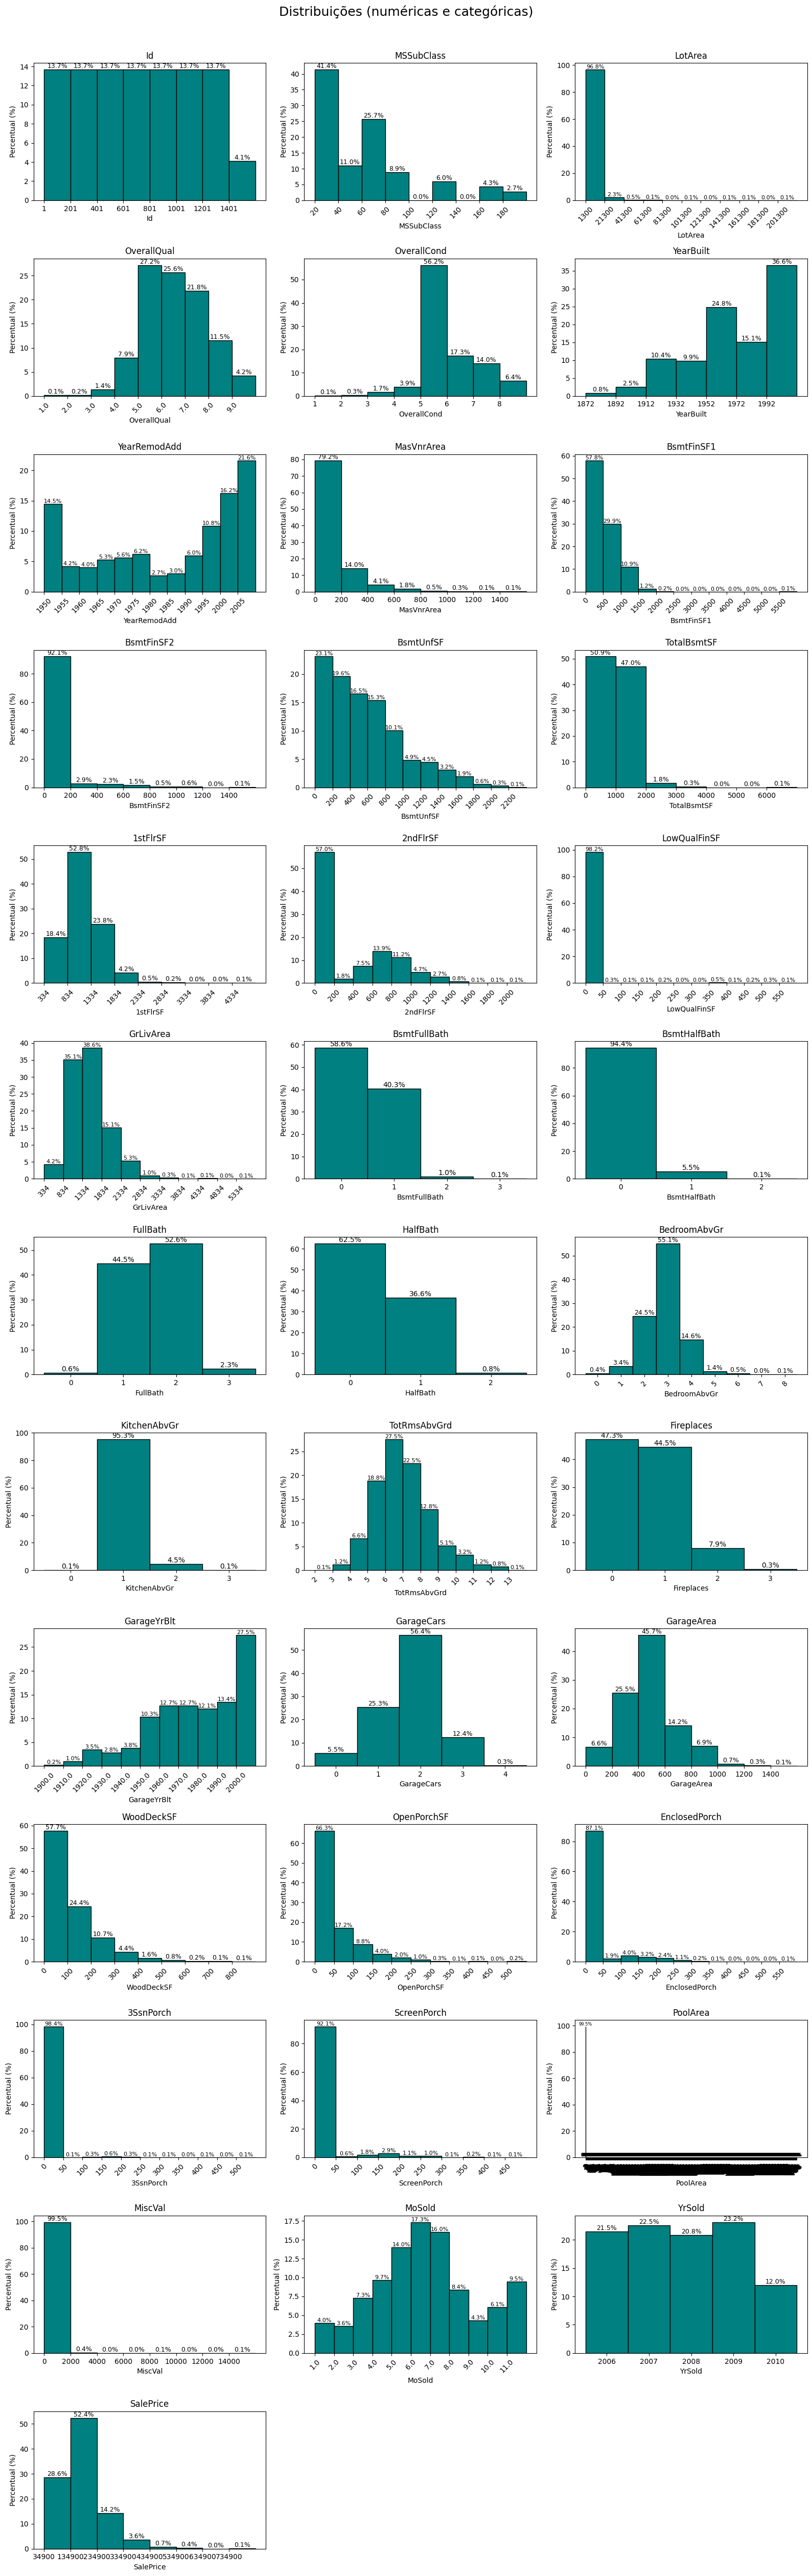

In [6]:
out=mult_plt2(dfn,max_bins=12,figsize=(16, 50))

#observações
# PoolArea

#round(dfn['PoolArea'].value_counts('normalize')*100,3)

In [7]:
def remove_outliers_zscore(data, cols, threshold=3):
    df_clean = data.copy()
    mask = np.ones(len(df_clean), dtype=bool)  # Começa com todos True

    for col in cols:
        mean = df_clean[col].mean()
        std = df_clean[col].std()

        # Evita divisão por zero
        if std == 0:
            continue
        
        z_scores = (df_clean[col] - mean) / std

        # Atualiza a máscara acumulando os filtros
        mask &= np.abs(z_scores) <= threshold

    print(f"✅ zscore aplicado com sucesso!")
    print(f"De {len(data)} para {len( df_clean[mask])} registros")
    print(f"Removidos: {len(data) - len( df_clean[mask])} outliers")

    return df_clean[mask]


# Aplicar

# ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
#        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
#        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
#        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
#        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
#        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
#        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
#        'MoSold', 'YrSold', 'SalePrice']

#dfa = remove_outliers_zscore(df2,df2.columns.drop('Id'),threshold=2)
#df2_filt=remove_outliers_zscore(df2,df2.columns.drop('Id'),threshold=3)

# Graficos com outliers removidos
# mult_plt(df2_filt,kind='box')
# mult_plt(df2_filt)

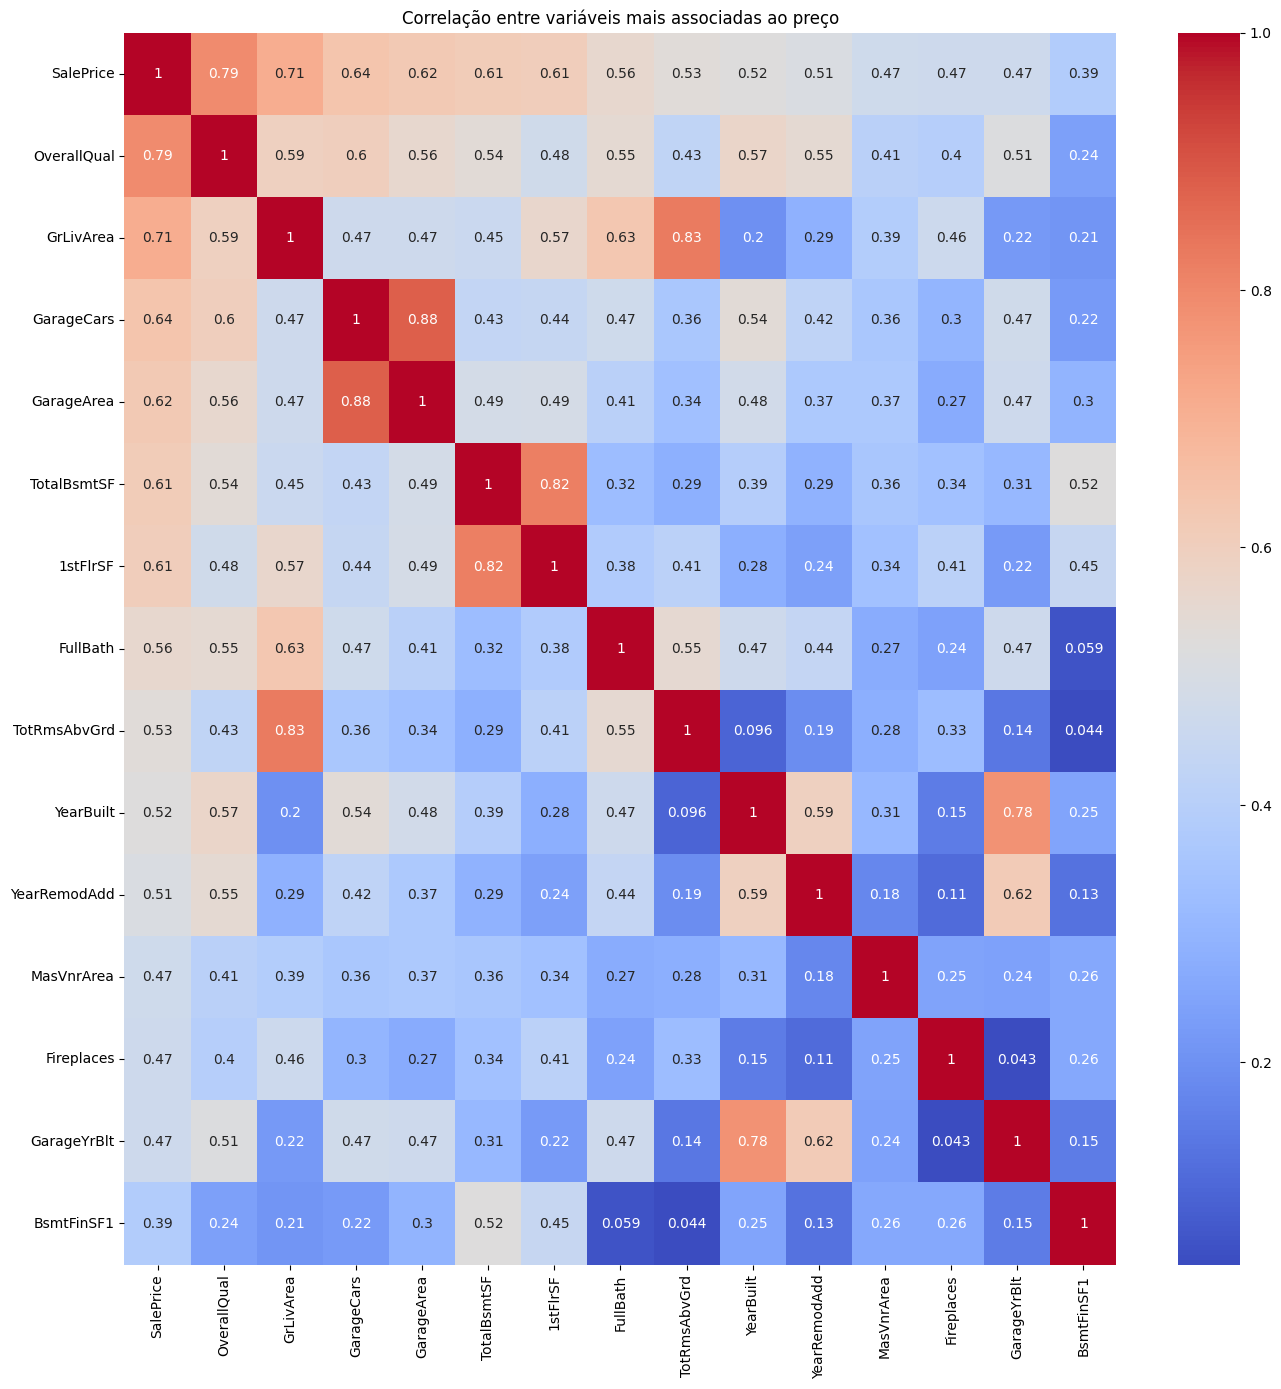

In [8]:
# Correlação com o preço de venda
corr = dfn.corr(numeric_only=True)   # realizar correlacao apenas nas variaveis numéricas                                 
top_corr = corr["SalePrice"].sort_values(ascending=False).head(15) # c
#print("Top correlações com SalePrice:\n", top_corr)
#display(top_corr)
# Heatmap das 10 principais variáveis
top_features = top_corr.index
plt.figure(figsize=(16, 16))
sns.heatmap(dfn[top_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlação entre variáveis mais associadas ao preço")
plt.show()

## 2-Separação das bases

In [9]:
start_time = time.time()

id_train=dfn['Id']
X=dfn.drop(['Id','SalePrice'],axis=1)
y=np.log1p(dfn['SalePrice'])
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [10]:
# regressão Linear
model_lr=LinearRegression().fit(X_train,y_train)
y_rl=model_lr.predict(X_test)

In [11]:
# Arvore de decisão
model_dt=tree.DecisionTreeRegressor(random_state=42).fit(X_train,y_train)
y_dt=model_dt.predict(X_test)

In [12]:
# KNN
model_knn=KNeighborsRegressor(n_neighbors=2).fit(X_train,y_train)
y_knn=model_knn.predict(X_test)

In [13]:
# random forest regressor
model_rf = RandomForestRegressor(n_estimators=100,random_state=42).fit(X_train, y_train)
y_rf = model_rf.predict(X_test)


In [14]:
model_rf2 = RandomForestRegressor(
    n_estimators=150,           # Balanceado
    max_depth=None,             # Sem limite de profundidade
    min_samples_split=2,        # Mais flexível
    min_samples_leaf=1,         # Mais flexível
    max_features=1.0,        # Todas as features
    bootstrap=True,
    random_state=42,
    n_jobs=-1
).fit(X_train, y_train)

y_rf2 = model_rf2.predict(X_test)

In [15]:
# Foca nos parâmetros mais importantes primeiro
param_dist_smart = {
    'n_estimators': randint(100, 400),          # Foco em estimadores
    'max_depth': [None, 10, 15, 20, 25, 30],    # Valores práticos
    'min_samples_split': [2, 5, 10, 15],        # Valores discretos
    'min_samples_leaf': [1, 2, 4, 6],           # Valores discretos
    'max_features': [0.3, 0.5, 0.7, 0.8, 1.0, 'sqrt'],  # Valores comuns
}
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_smart,
    n_iter=30,                   # 🔥 30 combinações balanceadas
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Executar busca
print("🔍 Buscando melhores parâmetros...")
random_search.fit(X_train, y_train)

# Melhores parâmetros encontrados
print("🎯 MELHORES PARÂMETROS ENCONTRADOS:")
print(random_search.best_params_)
#{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 149}
2#{'bootstrap': True, 'max_depth': 50, 'max_features': 0.4, 'max_samples': 0.9, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 434}


🔍 Buscando melhores parâmetros...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
🎯 MELHORES PARÂMETROS ENCONTRADOS:
{'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 153}


2

In [16]:
model_rf3 =random_search.best_estimator_
y_rf3= model_rf3.predict(X_test)

In [17]:
from xgboost import XGBRegressor

model_xg = XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
y_xg= model_xg.predict(X_test)


# 2. XGBoost com Hiperparâmetros Otimizados
model_xg2 = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,           
    learning_rate=0.1,           
    max_depth=6,                 
    subsample=0.8,              
    colsample_bytree=0.8,       
    random_state=42,
    n_jobs=-1
).fit(X_train, y_train)

y_xg2 = model_xg2.predict(X_test)


In [18]:
# Espaço de parâmetros para XGBoost
param_dist_xg = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),  # 0.01 to 0.31
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),      # 0.6 to 1.0
    'colsample_bytree': uniform(0.6, 0.4), # 0.6 to 1.0
    'gamma': uniform(0, 5),               # Regularização
    'reg_alpha': uniform(0, 10),          # L1 regularization
    'reg_lambda': uniform(1, 10)          # L2 regularization
}

xgb_s = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

random_search_xg = RandomizedSearchCV(
    estimator=xgb_s,
    param_distributions=param_dist_xg,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("🔍 Otimizando XGBoost...")
random_search_xg.fit(X_train, y_train)

print("🎯 Melhores parâmetros XGBoost:")
print(random_search_xg.best_params_)
print(f"Melhor R²: {random_search_xg.best_score_:.4f}")

model_xg_tuned = random_search_xg.best_estimator_
y_xg3 = model_xg_tuned.predict(X_test)

🔍 Otimizando XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
🎯 Melhores parâmetros XGBoost:
{'colsample_bytree': 0.6336559859980195, 'gamma': 0.8081435704730688, 'learning_rate': 0.2795662565581238, 'max_depth': 6, 'n_estimators': 353, 'reg_alpha': 0.09197051616629648, 'reg_lambda': 2.0147154286603213, 'subsample': 0.8654007076432223}
Melhor R²: 0.8304


In [19]:

def avaliar_modelos(y_test, predicoes, nomes_modelos):
    """
    Avalia e compara múltiplos modelos de regressão
    """
    resultados = []
    
    for nome, y_pred in zip(nomes_modelos, predicoes):
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        resultados.append({
            'Modelo': nome,
            'MAE': round(mae, 4),
            'RMSE': round(rmse, 4),
            'R²': round(r2, 4)
        })
    
    df_resultados = pd.DataFrame(resultados)
    return df_resultados.sort_values('R²', ascending=False)

# Avaliar todos os modelos
predicoes = [y_rl, y_dt, y_knn, y_rf,y_rf2,y_rf3,y_xg,y_xg2,y_xg3]
nomes_modelos = ['Regressão Linear', 'Árvore Decisão', 'KNN', 'Random Forest','Random Forest2','Random Forest3','xgboost','xgboost2','xgboost3']

resultados = avaliar_modelos(y_test, predicoes, nomes_modelos)
print("📊 COMPARAÇÃO DE MODELOS:")
print(resultados)

📊 COMPARAÇÃO DE MODELOS:
             Modelo     MAE    RMSE      R²
3     Random Forest  0.0948  0.1403  0.8840
5    Random Forest3  0.0929  0.1403  0.8839
4    Random Forest2  0.0953  0.1408  0.8831
7          xgboost2  0.0952  0.1447  0.8766
0  Regressão Linear  0.1084  0.1479  0.8710
6           xgboost  0.1010  0.1520  0.8638
8          xgboost3  0.1052  0.1524  0.8630
1    Árvore Decisão  0.1429  0.2025  0.7582
2               KNN  0.1647  0.2307  0.6863


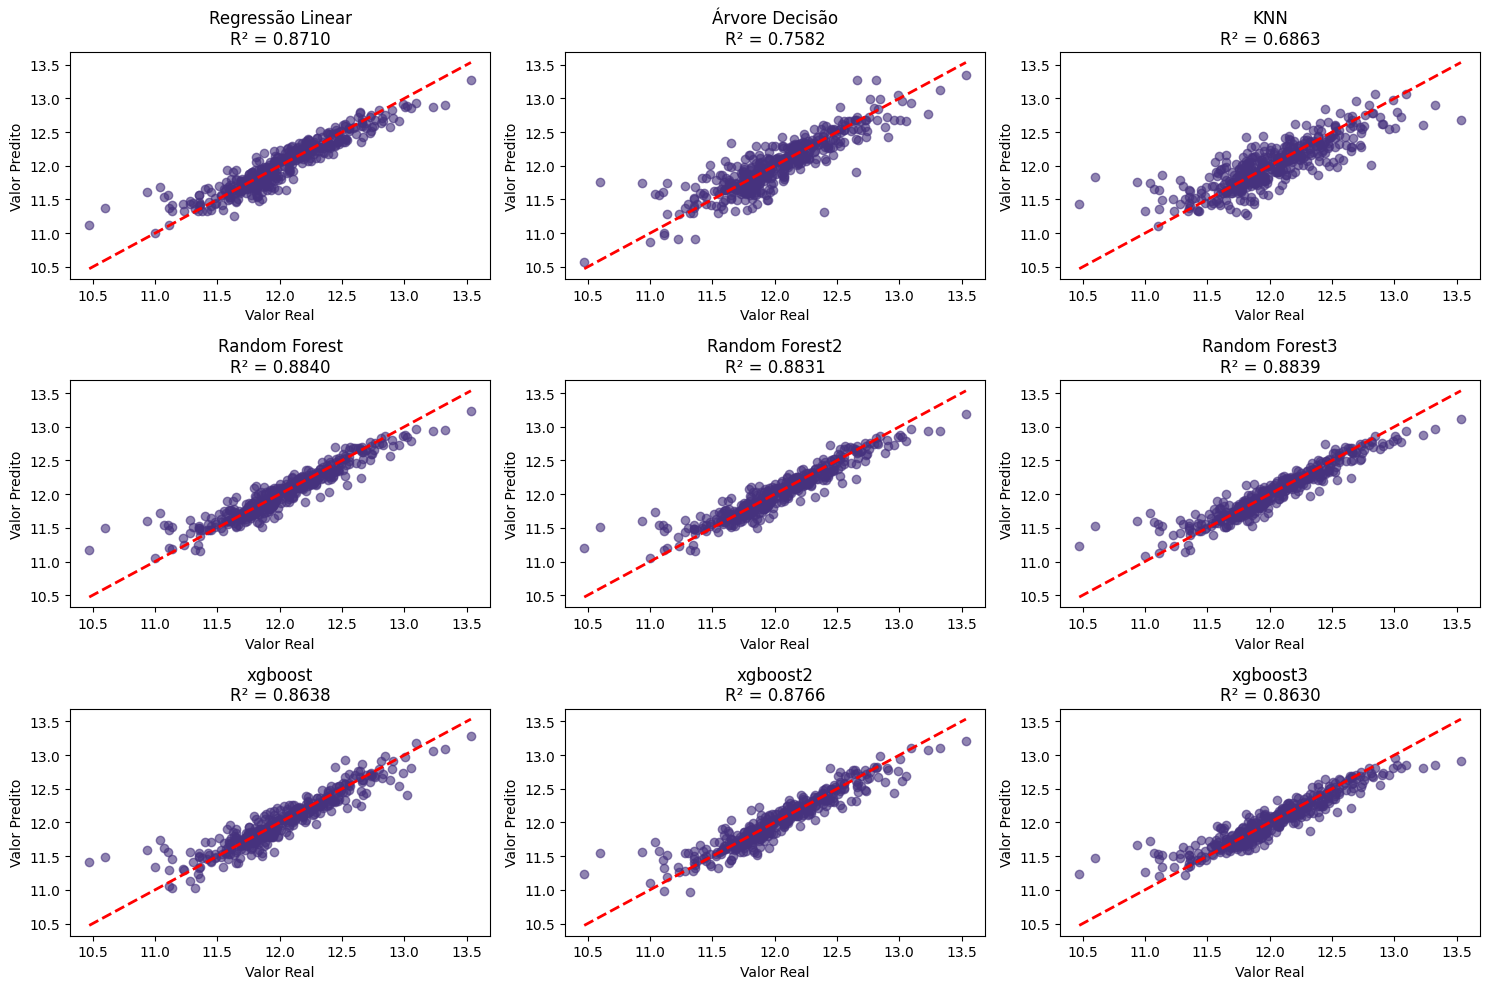

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparacao_modelos(y_test, predicoes, nomes_modelos):
    """
    Plota comparação visual dos modelos
    """
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, (nome, y_pred) in enumerate(zip(nomes_modelos, predicoes)):
        # Gráfico de dispersão: Real vs Predito
        axes[i].scatter(y_test, y_pred, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[i].set_xlabel('Valor Real')
        axes[i].set_ylabel('Valor Predito')
        axes[i].set_title(f'{nome}\nR² = {r2_score(y_test, y_pred):.4f}')
    
    plt.tight_layout()
    plt.show()

# Plotar comparação
plot_comparacao_modelos(y_test, predicoes, nomes_modelos)

# Realizando teste para submissão

In [21]:
base=pd.read_csv('/home/akel/PycharmProjects/Kaggle/HousePrices/data/test.csv')

In [22]:
df_test=base.copy()
print("=" * 50)
# Informações sobre o shape dos dados
print(f"\n📊 DIMENSÕES: {df_test.shape[0]} linhas × {df_test.shape[1]} colunas")
# remover mesmas colunas do treino ( colunas nulas > 10%)
df_test=df_test.drop(colunas_nulas,axis=1)
print(f"\n📊 DIMENSÕES: {df_test.shape[0]} linhas × {df_test.shape[1]} colunas")


📊 DIMENSÕES: 1459 linhas × 80 colunas

📊 DIMENSÕES: 1459 linhas × 73 colunas


In [23]:
# Novo dataframe para variaveis numericas df
df_testN=df_test[df_test.select_dtypes(include=['number']).columns] 
print(f"\n📊 DIMENSÕES: {df_testN.shape[0]} linhas × {df_testN.shape[1]} colunas")
# Informações sobre tipos de dados
print(f"\n🔧 Percentual de nulos(%):")
# informação sobre numero de nulos
print((df_testN.isnull().sum()/(df_testN.shape[0]*0.01)).sort_values(ascending=False).head(3).to_markdown())
print(f"Total de valores nulos: {df_testN.isnull().sum().sum()}")
df_testN = df_testN.fillna(-1)

print('✅ remoção dos nulos !')
print(f"Total de valores nulos: {df_testN.isnull().sum().sum()}")
print(f"\n📊 DIMENSÕES: {df_testN.shape[0]} linhas × {df_testN.shape[1]} colunas")


📊 DIMENSÕES: 1459 linhas × 36 colunas

🔧 Percentual de nulos(%):
|              |       0 |
|:-------------|--------:|
| GarageYrBlt  | 5.34613 |
| MasVnrArea   | 1.0281  |
| BsmtHalfBath | 0.13708 |
Total de valores nulos: 103
✅ remoção dos nulos !
Total de valores nulos: 0

📊 DIMENSÕES: 1459 linhas × 36 colunas


In [24]:
id_test = df_testN['Id']
X_final=df_testN.drop(['Id'],axis=1)
y_final = model_xg2.predict(X_final)


In [25]:
submission = pd.DataFrame({
    'Id': id_test,
    'SalePrice': y_final
})

# 5. Salvar o arquivo CSV (sem índice)
#submission.to_csv('submission_XGB2.csv', index=False)
print('arquivo salvo!')
end_time = time.time()
print(f"⏱️ Tempo de execução: {end_time - start_time:.2f} segundos")

arquivo salvo!
⏱️ Tempo de execução: 88.65 segundos
